In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
df=pd.read_csv('../datasets/LinearRegression/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<Axes: >

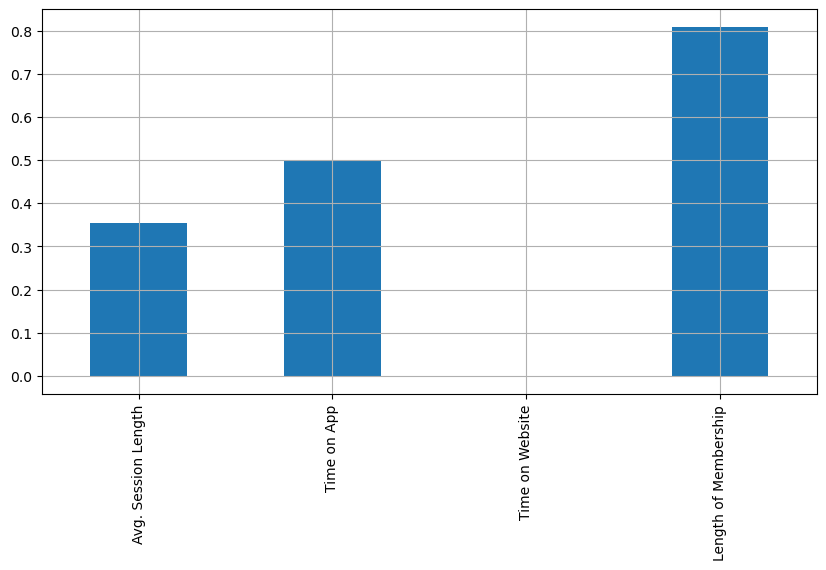

In [44]:
data=df.drop(['Yearly Amount Spent','Email','Address','Avatar'],axis='columns')
data.corrwith(df['Yearly Amount Spent']).plot.bar(figsize=(10,5), 
                                                rot = 90, grid = True)

In [45]:
X=df.drop(['Yearly Amount Spent','Email','Address','Avatar','Time on Website'],axis='columns')
y=df['Yearly Amount Spent']


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9878049658580093

In [46]:
model.predict([[20,15,2]])

c:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([180.52118257])

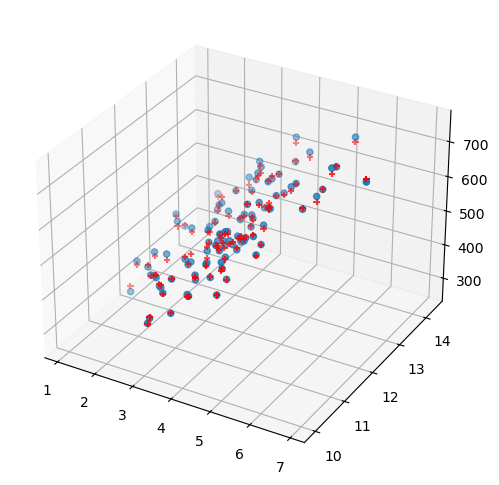

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Length of Membership'],X_test['Time on App'],y_test)
ax.scatter(X_test['Length of Membership'],X_test['Time on App'],model.predict(X_test),c='red',marker='+')